<a href="https://colab.research.google.com/github/niahizkia/fcc_machine_learning_project/blob/main/fcc_predict_health_costs_with_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

*Note: You are currently reading this using Google Colaboratory which is a cloud-hosted version of Jupyter Notebook. This is a document containing both text cells for documentation and runnable code cells. If you are unfamiliar with Jupyter Notebook, watch this 3-minute introduction before starting this challenge: https://www.youtube.com/watch?v=inN8seMm7UI*

---

In this challenge, you will predict healthcare costs using a regression algorithm.

You are given a dataset that contains information about different people including their healthcare costs. Use the data to predict healthcare costs based on new data.

The first two cells of this notebook import libraries and the data.

Make sure to convert categorical data to numbers. Use 80% of the data as the `train_dataset` and 20% of the data as the `test_dataset`.

`pop` off the "expenses" column from these datasets to create new datasets called `train_labels` and `test_labels`. Use these labels when training your model.

Create a model and train it with the `train_dataset`. Run the final cell in this notebook to check your model. The final cell will use the unseen `test_dataset` to check how well the model generalizes.

To pass the challenge, `model.evaluate` must return a Mean Absolute Error of under 3500. This means it predicts health care costs correctly within $3500.

The final cell will also predict expenses using the `test_dataset` and graph the results.

In [1]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

# import tensorflow_docs as tfdocs
# import tensorflow_docs.plots
# import tensorflow_docs.modeling

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [2]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
df = pd.read_csv('insurance.csv')
df.tail()

--2022-08-30 15:33:49--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.23’

insurance.csv.23    100%[===================>]  49.09K  --.-KB/s    in 0.001s  

2022-08-30 15:33:49 (79.2 MB/s) - ‘insurance.csv.23’ saved [50264/50264]



,age,sex,bmi,children,smoker,region,expenses
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95
1337,61,female,29.1,0,yes,northwest,29141.36


In [3]:
df["sex"] = pd.factorize(df["sex"])[0]
df["region"] = pd.factorize(df["region"])[0]
df["smoker"] = pd.factorize(df["smoker"])[0]

In [4]:
from sklearn.model_selection import train_test_split


X_train, X_test= train_test_split(df, test_size=0.2, random_state=50)

In [5]:
Y_train = X_train.pop("expenses")
Y_train

1048     3594.17
45      20630.28
201      8871.15
153     19964.75
1251     1241.57
          ...   
229      9225.26
70      16577.78
132     11163.57
1313    36397.58
109     47055.53
Name: expenses, Length: 1070, dtype: float64

In [6]:
Y_test = X_test.pop("expenses")
Y_test

589      5976.83
383      5846.92
534     13831.12
284      9625.92
821      2680.95
          ...   
871      3392.37
496      4931.65
578      9724.53
1012    36580.28
203     37133.90
Name: expenses, Length: 268, dtype: float64

In [7]:
normalizer = layers.experimental.preprocessing.Normalization()
normalizer.adapt(np.array(X_train))

model = keras.Sequential([
    normalizer,
    layers.Dense(24),
    layers.Dense(8),
    layers.Dropout(.2),
    layers.Dense(1),
])

In [8]:
model.compile(
    optimizer=tf.optimizers.Adam(learning_rate=0.09),
    loss='mae',
    metrics=['mae', 'mse']
)
model.build()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 6)                13        
 n)                                                              
                                                                 
 dense (Dense)               (None, 24)                168       
                                                                 
 dense_1 (Dense)             (None, 8)                 200       
                                                                 
 dropout (Dropout)           (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 390
Trainable params: 377
Non-trainable params: 13
_________________________________________________________

In [9]:
history = model.fit(
    X_train,
    Y_train,
    epochs=50,
    validation_split=0.5,
    verbose=0,
)

print(history)

9/9 - 0s - loss: 3358.3801 - mae: 3358.3801 - mse: 37412652.0000 - 34ms/epoch - 4ms/step
Testing set Mean Abs Error: 3358.38 expenses
You passed the challenge. Great job!


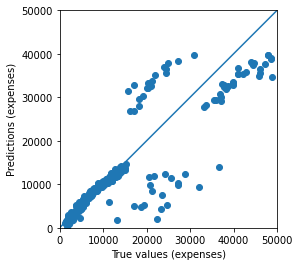

In [10]:
loss, mae, mse = model.evaluate(X_test, Y_test, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")


test_predictions = model.predict(X_test).flatten()

a = plt.axes(aspect='equal')
plt.scatter(Y_test, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
